In [1]:
COLAB = 'google.colab' in str(get_ipython())
if COLAB:
    from google.colab import drive
    drive.mount('/content/drive/')
    %cd /content/drive/MyDrive/Thesis/

In [1]:
import real_stuff.evaluating as evaluating
import real_stuff.simulating as simulating
import real_stuff.training as training
from real_stuff.basic_imports import *

import importlib  # doesn't work too well in Colab

Situation 6: sampling 3000 X_i ~ 1D uniform. f_k(X) = a normal. K = 4.
X:
 [0.375 0.951 0.732 ... 0.31  0.29  0.871]
Normalized funcs(X) = Y probabilities:
[[0.009 0.493 0.489 0.009]
 [0.    0.    0.005 0.995]
 [0.    0.001 0.153 0.847]
 ...
 [0.037 0.711 0.25  0.002]
 [0.054 0.752 0.193 0.001]
 [0.    0.    0.019 0.981]]
Unnormalized funcs(X):
[[3.600e-02 1.943e+00 1.929e+00 3.500e-02]
 [0.000e+00 0.000e+00 5.000e-03 8.790e-01]
 [0.000e+00 2.000e-03 5.700e-01 3.159e+00]
 ...
 [1.480e-01 2.847e+00 1.003e+00 6.000e-03]
 [2.160e-01 3.032e+00 7.790e-01 4.000e-03]
 [0.000e+00 0.000e+00 3.900e-02 1.991e+00]]
Euclidean distance between those: 112.16692091208476


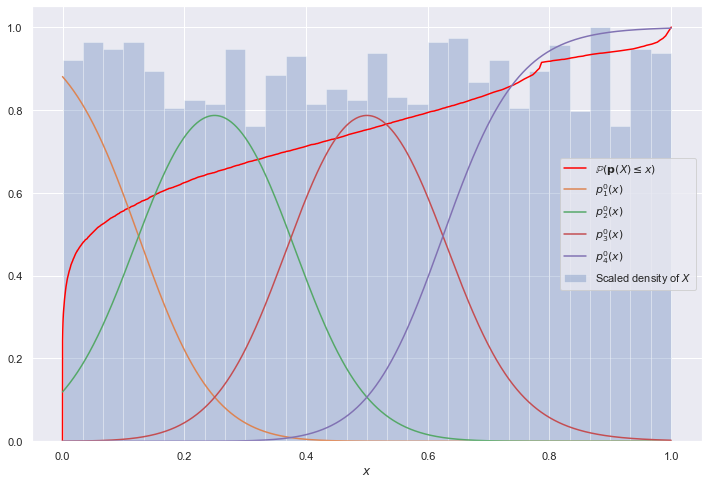

In [3]:
importlib.reload(simulating)
situation = 6.4
X, funcs, Y_prob = simulating.create_dataset(str(situation), n=3000, viz=True)

Max 0/1-accuracy during training: 0.7606666666666667
Epoch 1/420
160/160 [==============================] - 0s 3ms/step - loss: 1.5106 - accuracy: 0.3271 - val_loss: 1.3536 - val_accuracy: 0.4313
Epoch 2/420
160/160 [==============================] - 0s 1ms/step - loss: 1.1389 - accuracy: 0.5516 - val_loss: 0.9473 - val_accuracy: 0.6417
Epoch 3/420
160/160 [==============================] - 0s 1ms/step - loss: 0.9056 - accuracy: 0.6370 - val_loss: 0.8169 - val_accuracy: 0.6500
Epoch 4/420
160/160 [==============================] - 0s 1ms/step - loss: 0.8278 - accuracy: 0.6677 - val_loss: 0.7490 - val_accuracy: 0.7604
Epoch 5/420
160/160 [==============================] - 0s 1ms/step - loss: 0.7871 - accuracy: 0.6880 - val_loss: 0.7259 - val_accuracy: 0.7521
Epoch 6/420
160/160 [==============================] - 0s 1ms/step - loss: 0.7807 - accuracy: 0.7005 - val_loss: 0.7211 - val_accuracy: 0.7375
Epoch 7/420
160/160 [==============================] - 0s 1ms/step - loss: 0.7792 - accur

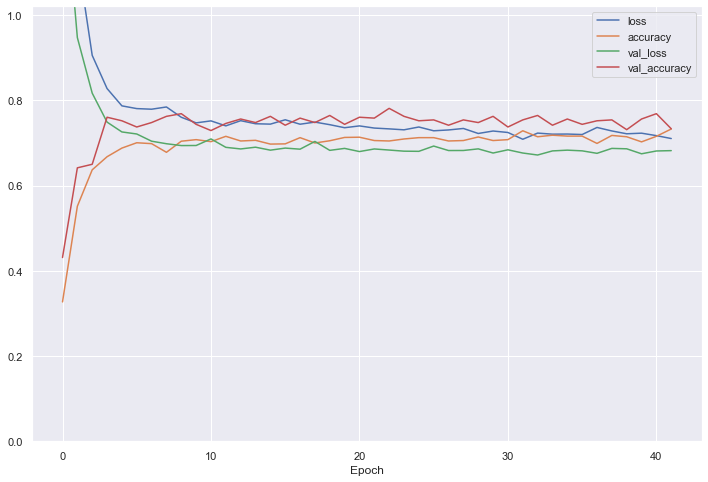

In [4]:
importlib.reload(training)
model, X_test, Y_test, Y_prob_test = training.train_network(X, Y_prob, viz=1)

In [5]:
importlib.reload(evaluating)
evaluating.get_all_quantities_of_interest(model, X_test, Y_test, Y_prob_test)

{'One-hot log-likelihood': 0.5113014,
 'One-hot KL divergence': 0.51129836,
 'Probability vec log-likelihood': 0.5365497,
 'Probability vec KL divergence': 0.015054617,
 'Pr vec KL div truncated (at 0.5)': 0.5,
 '~ inf norm diff': 0.1980399626751449,
 'Biases > epsilon': 32,
 'Total biases': 68,
 'Weights > epsilon': 262,
 'Total weights': 848,
 'Epsilon': 0.001,
 's': 294}

Some examples from test set:
X:
[[0.341]
 [0.072]
 [0.41 ]
 ...
 [0.31 ]
 [0.29 ]
 [0.871]]
True:
[[0.02  0.619 0.357 0.004]
 [0.699 0.298 0.002 0.   ]
 [0.004 0.356 0.62  0.02 ]
 ...
 [0.037 0.711 0.25  0.002]
 [0.054 0.752 0.193 0.001]
 [0.    0.    0.019 0.981]]
Predict:
[[0.031 0.59  0.372 0.007]
 [0.662 0.329 0.009 0.   ]
 [0.009 0.417 0.55  0.024]
 ...
 [0.057 0.653 0.287 0.004]
 [0.085 0.686 0.227 0.003]
 [0.    0.    0.053 0.947]]


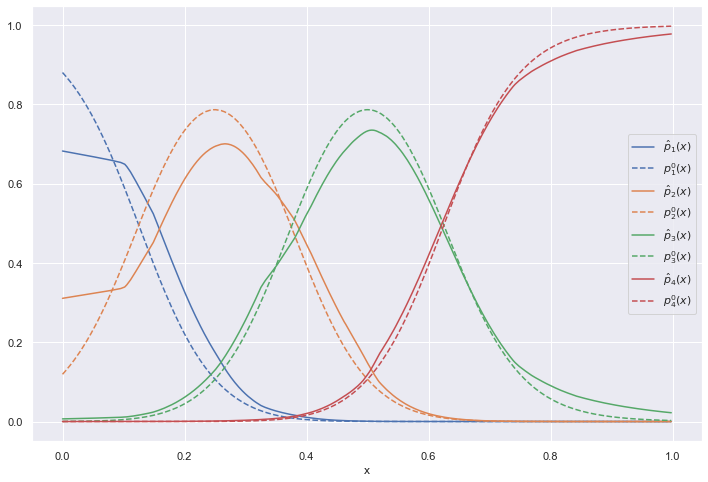

In [7]:
importlib.reload(evaluating)
evaluating.visualize(model, X_test, Y_test, Y_prob_test)

## Temp

In [8]:
!python test.py 6.2

Starting 3 runs of situation 6.2 with network [16, 16, 16, 16, 16].
0.25%, 0.75% quantiles of results:
One-hot log-likelihood: [0.3446, 0.3569]
One-hot KL divergence: [0.3446, 0.3569]
Probability vec log-likelihood: [0.3493, 0.3537]
Probability vec KL divergence: [0.0042, 0.0051]
Pr vec KL div truncated (at 0.5): [0.5, 0.5]
~ inf norm diff: [0.1329, 0.1461]
Biases > epsilon: [14.0, 23.0]
Total biases: [82.0, 82.0]
Weights > epsilon: [129.0, 134.5]
Total weights: [1072.0, 1072.0]
Epsilon: [0.001, 0.001]
s: [143.5, 155.5]


[0.00000000e+00 1.86264515e-09 0.00000000e+00 ... 2.27373675e-13
 2.27373675e-13 0.00000000e+00]
{'t^0.06666666666666667': array([0.46415888, 0.46418953, 0.46422018, ..., 0.89814126, 0.89820056,
       0.89825987])}


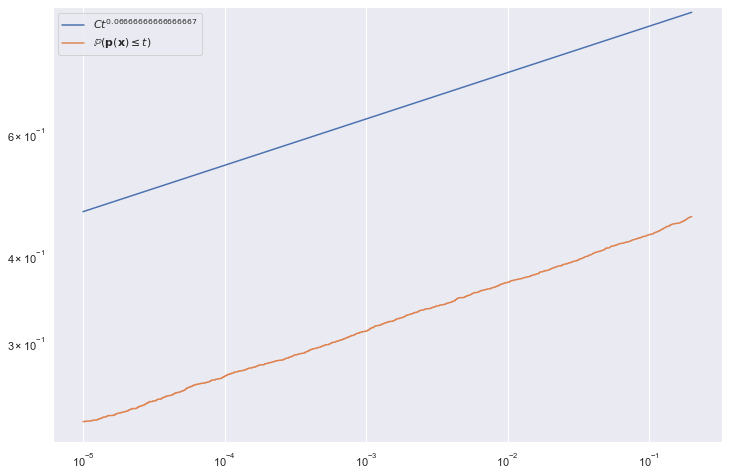

In [14]:
def alpha_C_finder(t_space, p_X_small, alphas):
    # TODO!!
    print(np.gradient(p_X_small, t_space))
    result = {}
    for alpha in alphas:
        t_alpha = np.power(t_space, alpha)
        C = np.ceil(np.max(p_X_small / t_alpha))
        result[f't^{alpha}'] = C * t_alpha
    return result


t_space = np.geomspace(1e-5, 0.2, 10_000)
p_X_small = np.array([np.mean(Y_prob <= t) for t in t_space])
alphas = [1 / 15]
results = alpha_C_finder(t_space, p_X_small, alphas)
print(results)

for alpha in alphas:
    C_t_alpha = results[f't^{alpha}']

    plt.plot(t_space, C_t_alpha, label="$C t^{%s}$" % alpha)
    plt.plot(t_space, p_X_small, label="$\mathbb{P}(\mathbf{p}(\mathbf{x}) \leq t)$")
    plt.legend()
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(top=max(p_X_small) * 1.5)
    plt.show()

In [9]:
!python test.py 6.8

Starting 3 runs of situation 6.8 with network [16, 16, 16, 16, 16].
0.25%, 0.75% quantiles of results:
One-hot log-likelihood: [0.7013, 0.7305]
One-hot KL divergence: [0.7013, 0.7305]
Probability vec log-likelihood: [0.7018, 0.7148]
Probability vec KL divergence: [0.0747, 0.0847]
Pr vec KL div truncated (at 0.5): [nan, nan]
~ inf norm diff: [0.4182, 0.467]
Biases > epsilon: [25.5, 33.5]
Total biases: [88.0, 88.0]
Weights > epsilon: [277.0, 300.0]
Total weights: [1168.0, 1168.0]
Epsilon: [0.001, 0.001]
s: [302.5, 333.5]


In [43]:
def f1(X, m=30):
#     y = 0
#     for k in range(0, m, 1):
#         y += ((-1)**k)*(X**(1+2*k))/np.math.factorial(1+2*k)
#     return y
    return sum(
        [(-1) ** (i+1) * X ** (2*i-1) / np.math.factorial(2*i-1) for i in range(1, m, 1)]) + .00001


X = np.random.uniform(size=1000)
order = np.argsort(X)
plt.plot(X[order], f1(X[order], 50), color='red')
plt.plot(X[order], np.sin(X[order]), color='blue')
f1(1), np.sin(1)

ValueError: factorial() not defined for negative values